The Risk Process

Exemple d'un modèle pour la richesse d'une compagnie d'assurance:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

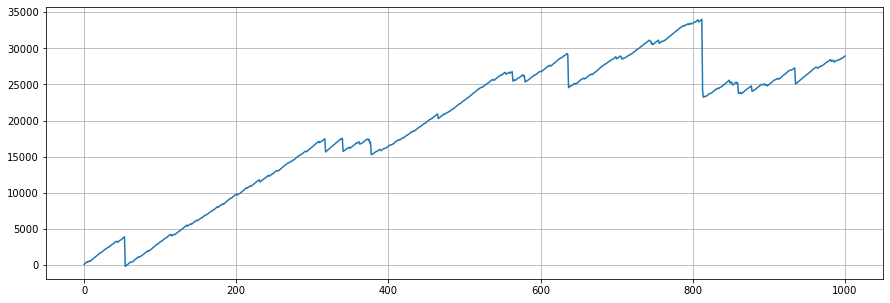

In [8]:
u = 100
Tfin = 1000
cst = 100

def richesse_uni(u,cst,Tfin):
    R = np.zeros(Tfin)
    R[0] = u
    claim = 0
    tla = 0  #time of the last accident
    for t in range(1,Tfin):
        twa = t - tla #time without accident
        X = np.random.uniform(twa)
        if X > 10: 
            pa = X*10  #power of the accident
            claim += pa 
            tla = t
            
        R[t] = u + cst*t - claim
    x = np.linspace(0,Tfin,Tfin)
    plt.figure(figsize = (15,5))
    plt.grid()
    plt.plot(x,R,markersize=0.1)

def richesse_exp(u,cst,Tfin):
    R = np.zeros(Tfin)
    R[0] = u
    claim = 0
    tla = 0  #time of the last accident
    for t in range(1,Tfin):
        twa = t - tla #time without accident
        X = np.random.exponential(twa/10)
        if X <0.5: 
            pa = min(1/(X),10000)  #power of the accident
            claim += pa 
            tla = t
            
        R[t] = u + cst*t - claim
    x = np.linspace(0,Tfin,Tfin)
    plt.figure(figsize = (15,5))
    plt.grid()
    plt.plot(x,R,markersize=0.1)

#richesse_uni(u,cst,Tfin)
richesse_exp(u,100,1000)

Processus de Poisson:
Illustration du Th 1.5

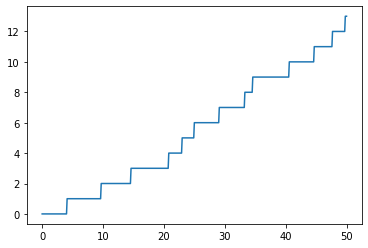

In [160]:
        
def poisson(lamb, tf, nb_catas):
    n = nb_catas
    W = np.zeros(n)
    for i in range(n): #il y a bien n catas, le W0 = 0 sert à r 
        W[i] = np.random.exponential(lamb)
    
    T = np.zeros(n+1)
    for i in range(0,n):
        T[i+1] = T[i] + W[i]
    
    t = np.linspace(0,tf,tf*10+1)
    N = np.zeros(tf*10+1)
    Nt = np.array([t,N])
    k = 1

    for i in range(tf*10+1):
        Nt[1,i] = k - 1
        if Nt[0,i] > T[k]:
            k = k + 1
        if k >= n: 
            k = n
    
    return Nt
p = poisson(5,50,100)
plt.plot(p[0,:],p[1,:])


In [95]:
zeros = np.linspace(0,10,10+1)
ones = np.ones(10+1)
T = np.array([zeros,ones])
print(T)

[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]


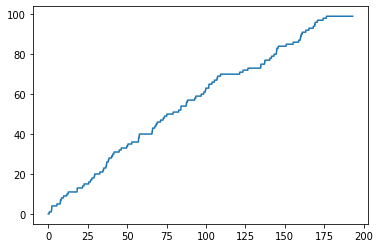

In [180]:
    
def poisson_2(lamb, nb_catas):
    n = nb_catas
    W = np.zeros(n)
    for i in range(n): #il y a bien n catas, le W0 = 0 sert à r 
        W[i] = np.random.exponential(lamb)
    
    T = np.zeros(n+1)
    for i in range(0,n):
        T[i+1] = T[i] + W[i]
    tf = int(T[-1])+10
    t = np.linspace(0,tf,tf*10+1)
    N = np.zeros(tf*10+1)
    Nt = np.array([t,N])
    k = 1

    for i in range(tf*10+1):
        Nt[1,i] = k - 1
        if Nt[0,i] > T[k]:
            k = k + 1
        if k >= n: 
            k = n
    
    return Nt,T
p = poisson_2(2,100)[0]
plt.plot(p[0,:],p[1,:])


In [3]:
def regLin(x, y):
    """
    Ajuste une droite d'équation a*x + b sur les points (x, y) par la méthode
    des moindres carrés.

    Args :
        * x (list): valeurs de x
        * y (list): valeurs de y

    Return:
        * a (float): pente de la droite
        * b (float): ordonnée à l'origine
    """
    # initialisation des sommes
    x_sum = 0.
    x2_sum = 0.
    y_sum = 0.
    xy_sum = 0.
    # calcul des sommes
    for xi, yi in zip(x, y):
        x_sum += xi
        x2_sum += xi**2
        y_sum += yi
        xy_sum += xi * yi
    # nombre de points
    npoints = len(x)
    # calcul des paramétras
    a = (npoints * xy_sum - x_sum * y_sum) / (npoints * x2_sum - x_sum**2)
    b = (x2_sum * y_sum - x_sum * xy_sum) / (npoints * x2_sum - x_sum**2)
    # renvoie des parametres
    return a, b

Modèle 1:
Nombre de catas i.e. nb Tn: 516
Valeur de nu observé: 19.651162790697676
Valeur de Rho observe: 39.30232558139535
1/n x Y_tilde = 17.697674418604652
nu - c/lambda = 19.151162790697676
9132




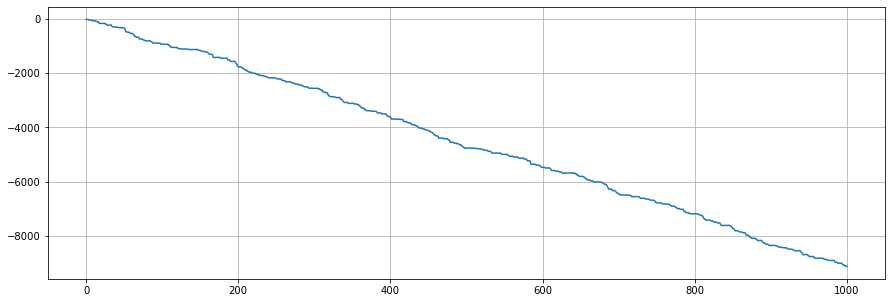

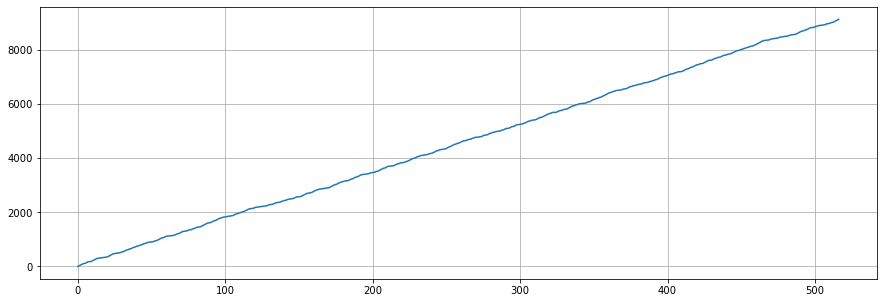

In [85]:
def cl(u,cst,lamb,Tfin): # modèle de Cramer Lundberg avec Nt selont un poisson(lambda*t) le processus de renouvellement suit
                         # une loi exponentielle et le processus de comptage une loi de poisson
        
    # Initialisation de R, la richesse de l'assurance pour jusqu'au temps Tfin
    R = np.zeros(Tfin)
    R[0] = u            # Richesse initiale 
    
    Y_tild = []
    T=0 # Pointeur sur le temps t 
    Xsave = []
    Tsave = []
    Wsave = []
    nu = 0
    while T < Tfin : # On s'arrete une fois que T depasse Tfinal
        W = np.random.exponential(lamb)
        W = round(W)
        Wsave.append(W)
        X = 0
        B = np.random.binomial(1,0.5)
        if B == 0:
            X = 10
        if B == 1:
            X = 30
        Xsave.append(X)

        if T + W > Tfin:
            for t in range (0,Tfin-T):
                R[T+t] = R[T] + cst*(t)
            T = Tfin 
                
        if T + W <= Tfin:
            for t in range (0,W+1):
                R[T+t] = R[T] + cst*(t)
            R[T+W] = R[T+W]-X
            T = T + W
        Tsave.append(T)
        
    Y = []
    Y.append(Xsave)
    Y.append(Tsave)
    Y.append(Wsave)
    Y = np.array(Y)  #1ere ligne les X 2eme ligne les T associés  3eme ligne les Wk
    s = 0
    #print(Xsave)
    print("Nombre de catas i.e. nb Tn: " + str(len(Y[0,:])))
    for i in range(len(Xsave)):
        s = s + Xsave[i]
    nu_obs = s/len(Xsave)
    print("Valeur de nu observé: "+str(nu_obs))
    rho = lamb*nu_obs/cst
    print("Valeur de Rho observe: "+str(rho))
    
    
    for n in range(len(Y[0,:])):
        somme = 0
        for i in range(n):
            somme = somme + Y[0,i] - cst*Y[2,i]
        Y_tild.append(somme)
    
    print("1/n x Y_tilde = " +str((1/len(Y_tild))*Y_tild[-1]))
    
    return R,rho,Y_tild, nu_obs,Y
        
def affiche_R(R,Tfin):
    x = np.linspace(0,Tfin,Tfin)
    plt.figure(figsize = (15,5))
    plt.grid()
    plt.plot(x,R,markersize=0.1)
    a,b = regLin(x,R)
    #plt.plot(x,a*x+b)

def affiche_Y(Y):
    n = len(Y)
    x = np.linspace(0,n,n)
    plt.figure(figsize = (15,5))
    plt.grid()
    plt.plot(x,Y,markersize=0.1)
    
# cl( u, cst , lambda , Tfinal)
# rho = lambda * nu (espérence de X)/cst
print("Modèle 1:")
u = 10
cst = 1
lamb = 2
Tfinal = 1000
C,rho,Y_ti,nu,Y = cl(u,cst,lamb, Tfinal) 
print("nu - c/lambda = " +str(nu - cst/lamb))
affiche_R(C,Tfinal)
affiche_Y(Y_ti)
print(Y_ti[-1])
print("\n")





In [129]:
np.random.binomial(1,0.5)

0

In [158]:
Y = []
Y.append([1,0])
Y.append([1,2])
Y = np.array(Y)
print(Y)
print(Y[1,1])

[[1 0]
 [1 2]]
2
